# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

# Data Loading

In [14]:
# Load the data
train_data = pd.read_csv("train.csv", index_col='id')

# Calling it full because it's before splitting

# Training data
y_train_full = train_data['accident_risk']
X_train_full = train_data.drop('accident_risk', axis=1)


# EDA

In [15]:
X_train_full.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
id,,,,,,,,,,,,
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1


In [16]:
X_train_full.describe()

,num_lanes,curvature,speed_limit,num_reported_accidents
count,517754.000000,517754.000000,517754.000000,517754.000000
mean,2.491511,0.488719,46.112575,1.187970
std,1.120434,0.272563,15.788521,0.895961
min,1.000000,0.000000,25.000000,0.000000
25%,1.000000,0.260000,35.000000,1.000000
50%,2.000000,0.510000,45.000000,1.000000
75%,3.000000,0.710000,60.000000,2.000000
max,4.000000,1.000000,70.000000,7.000000


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517754 entries, 0 to 517753
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               517754 non-null  object 
 1   num_lanes               517754 non-null  int64  
 2   curvature               517754 non-null  float64
 3   speed_limit             517754 non-null  int64  
 4   lighting                517754 non-null  object 
 5   weather                 517754 non-null  object 
 6   road_signs_present      517754 non-null  bool   
 7   public_road             517754 non-null  bool   
 8   time_of_day             517754 non-null  object 
 9   holiday                 517754 non-null  bool   
 10  school_season           517754 non-null  bool   
 11  num_reported_accidents  517754 non-null  int64  
 12  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(2), int64(3), object(4)
memory usage: 41.5+ MB


[<AxesSubplot:xlabel='road_type'>,
 <AxesSubplot:xlabel='num_lanes'>,
 <AxesSubplot:xlabel='curvature'>,
 <AxesSubplot:xlabel='speed_limit'>,
 <AxesSubplot:xlabel='lighting'>,
 <AxesSubplot:xlabel='weather'>,
 <AxesSubplot:xlabel='road_signs_present'>,
 <AxesSubplot:xlabel='public_road'>,
 <AxesSubplot:xlabel='time_of_day'>,
 <AxesSubplot:xlabel='holiday'>,
 <AxesSubplot:xlabel='school_season'>,
 <AxesSubplot:xlabel='num_reported_accidents'>]

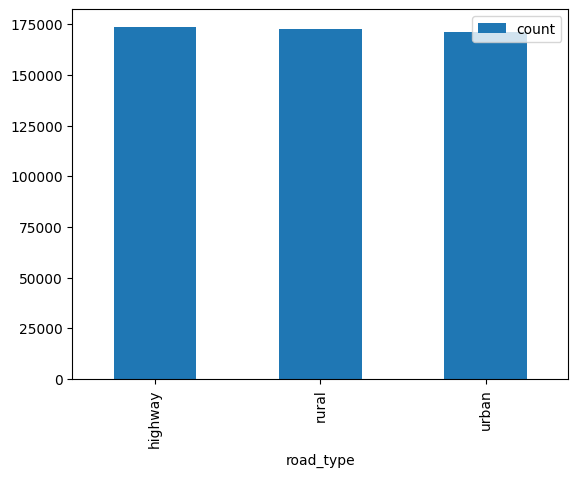

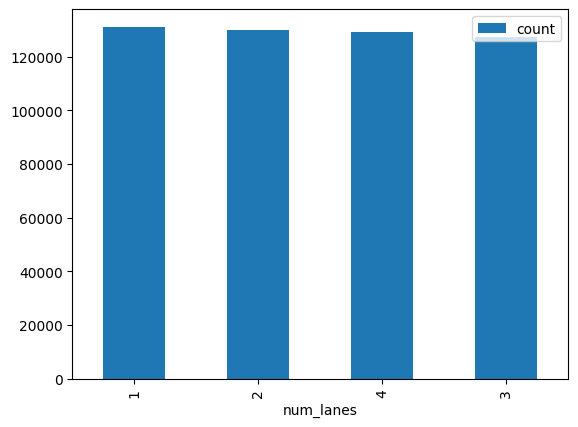

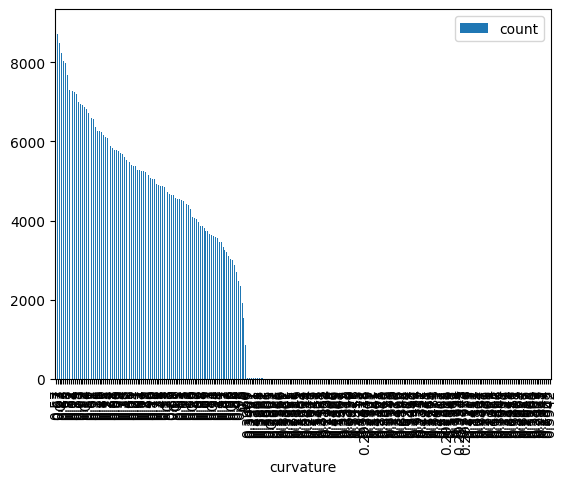

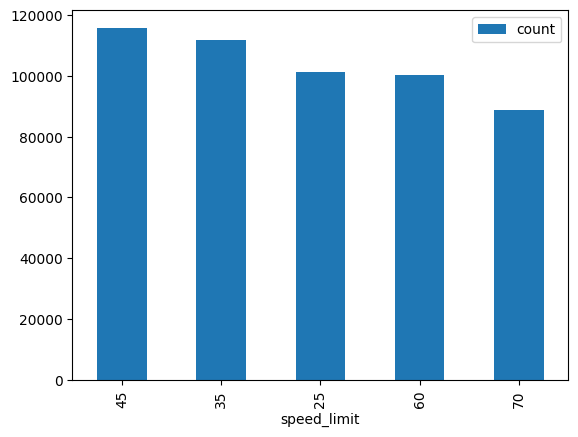

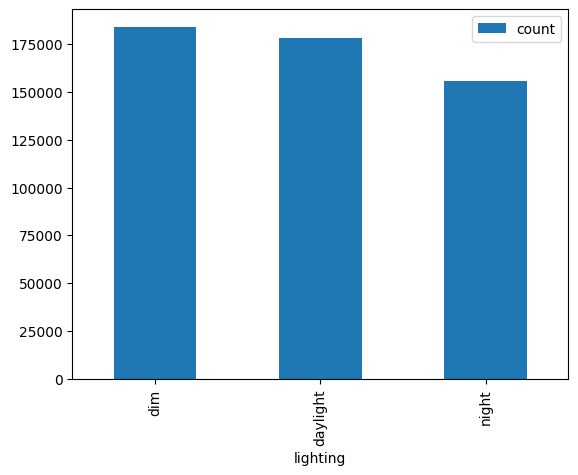

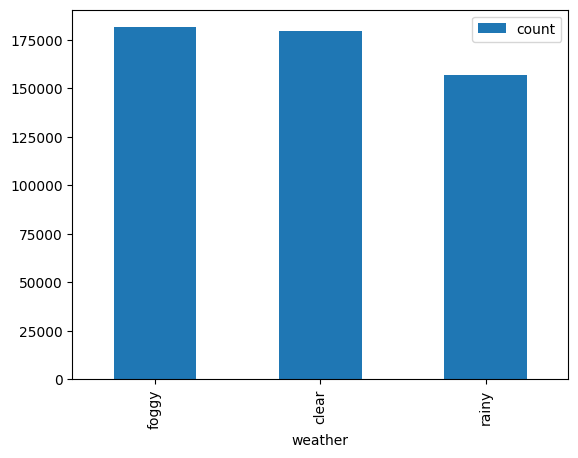

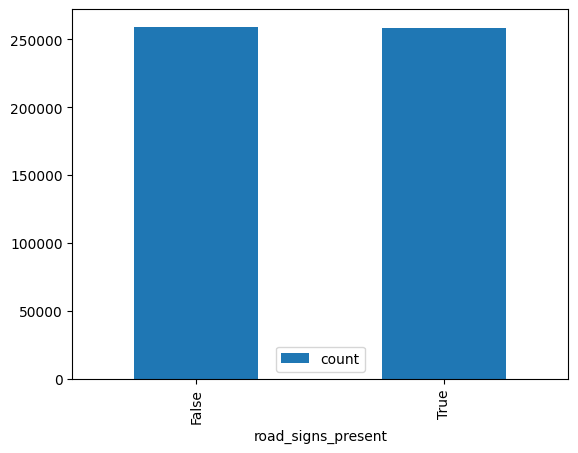

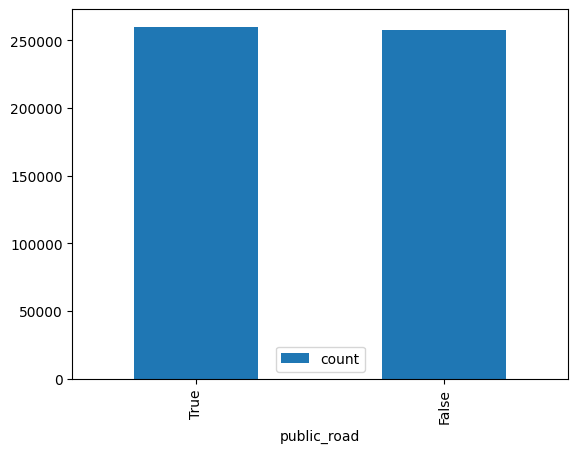

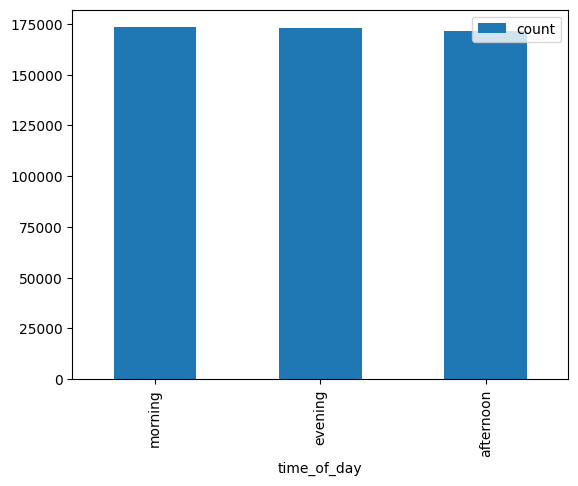

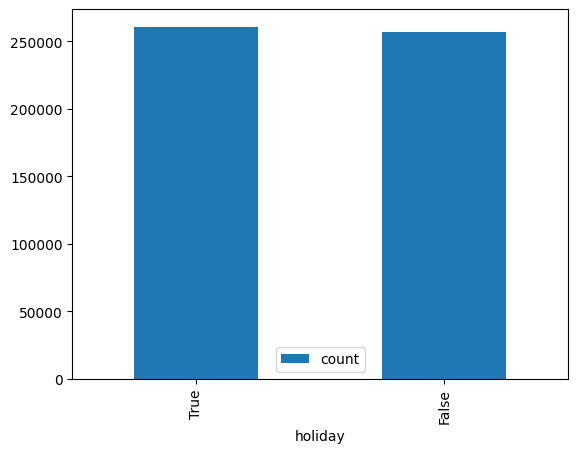

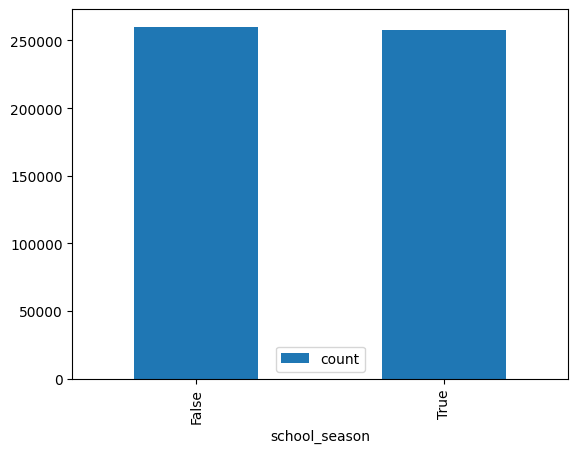

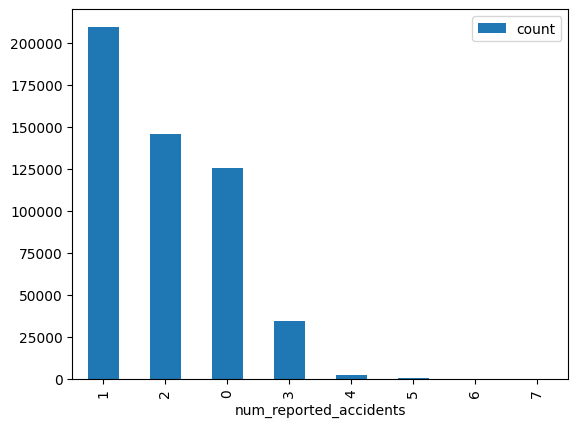

In [36]:
[pd.DataFrame(X_train_full[col].value_counts()).plot(kind='bar') for col in X_train_full.columns ]

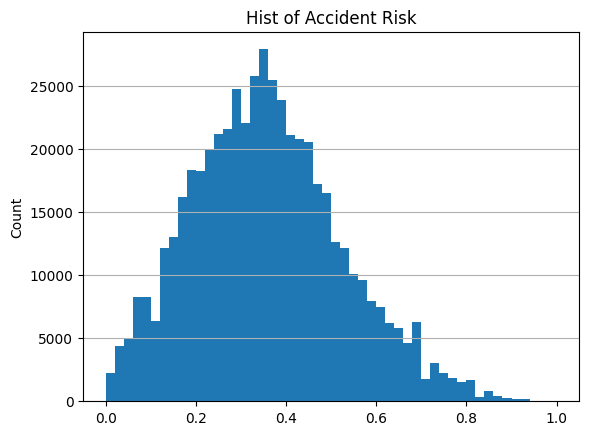

In [37]:
x = y_train_full
plt.hist(x=x, bins = 50)
plt.title("Hist of Accident Risk")
plt.ylabel('Count')
plt.grid(axis = 'y')
plt.show()

# Data Preprocessing

In [38]:
# Checking column dtypes
X_train_full.dtypes

road_type                  object
num_lanes                   int64
curvature                 float64
speed_limit                 int64
lighting                   object
weather                    object
road_signs_present           bool
public_road                  bool
time_of_day                object
holiday                      bool
school_season                bool
num_reported_accidents      int64
dtype: object

In [39]:
# Make list of all columns that are of Object dtype
obj_cols = [col for col in X_train_full.columns if X_train_full[col].dtype == 'O']

X_train_full[obj_cols] = X_train_full[obj_cols].astype('category')

In [40]:
# Checking column dtypes
X_train_full.dtypes

road_type                 category
num_lanes                    int64
curvature                  float64
speed_limit                  int64
lighting                  category
weather                   category
road_signs_present            bool
public_road                   bool
time_of_day               category
holiday                       bool
school_season                 bool
num_reported_accidents       int64
dtype: object

In [47]:
# Data Split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Loading and Optimising The Model

In [ ]:
# Load Model
model = XGBRegressor(random_state = 42, enable_categorical = True)

## Hyperparameter Tuning

In [27]:
search_space = { 'n_estimators': [100,300,500],
                'max_depth': [3, 6, 9],
                'gamma': [0.01, 0.1],
                'learning_rate': [0.001, 0.01, 0.1, 1]

}

In [28]:
GS = GridSearchCV(estimator=model,
                  param_grid=search_space,
                  scoring='neg_root_mean_squared_error',
                  refit='neg_root_mean_squared_error',
                  cv=5,
                  verbose= 4)

In [29]:
GS.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100;, score=-0.155 total time=   0.7s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100;, score=-0.156 total time=   0.7s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100;, score=-0.155 total time=   0.7s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100;, score=-0.155 total time=   0.7s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100;, score=-0.155 total time=   0.7s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=300;, score=-0.136 total time=   2.0s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=300;, score=-0.137 total time=   2.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=300;, score=-0.136 total time=   2.0s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3,

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'gamma': [0.01, 0.1],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 300, 500]},
             refit='neg_root_mean_squared_error',
             scoring='neg_root_mean_squared_error', verbose=4)

In [30]:
print(GS.best_estimator_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [31]:
print(GS.best_params_)

{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}


In [32]:
print(GS.best_score_)

-0.05606257175031335


In [33]:
GS_pred = GS.predict(X_val)
RMSE_GS = root_mean_squared_error(y_val, GS_pred)
RMSE_GS

0.05620541517015819

# Hard Coded Model With Best Params

In [48]:
best_params = {'gamma': 0.01, 
               'learning_rate': 0.1, 
               'max_depth': 9, 
               'n_estimators': 100}

best_params_model = XGBRegressor(random_state = 42, enable_categorical = True, **best_params)

In [49]:
# Fit model
best_params_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [51]:
y_preds = best_params_model.predict(X_val)

RMSE = root_mean_squared_error(y_true=y_val, y_pred=y_preds)
RMSE

#0.05640224661731446

0.05617024864475643

# Predicting On Test Data for Submission

In [54]:
# Load the testing data
test_data = pd.read_csv("test.csv", index_col='id')

In [55]:
# Transfrom data types
obj_cols = [col for col in test_data.columns if test_data[col].dtype == 'O']

test_data[obj_cols] = test_data[obj_cols].astype('category')

test_data.dtypes

road_type                 category
num_lanes                    int64
curvature                  float64
speed_limit                  int64
lighting                  category
weather                   category
road_signs_present            bool
public_road                   bool
time_of_day               category
holiday                       bool
school_season                 bool
num_reported_accidents       int64
dtype: object

In [61]:
test_data.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
id,,,,,,,,,,,,
517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [74]:
test_preds = best_params_model.predict(test_data)

submission = pd.DataFrame({'id': test_data.index, 'accident_risk':test_preds})

submission

,id,accident_risk
0,517754,0.301330
1,517755,0.121844
2,517756,0.180515
3,517757,0.312077
4,517758,0.409288
...,...,...
172580,690334,0.104794
172581,690335,0.519714
172582,690336,0.250706
172583,690337,0.127939


In [76]:
submission.to_csv('submission.csv', index=False)